In [1]:
import pandas as pd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from util import *

/Users/sanja7s/Dropbox/PROJECTS7S/BL_Projects7S/ONGOING7S/Lead7s/RAI4EO/AI4EO_Fellowship/Health/Neurips Data/repo/code/models_and_xai/util.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
year = 2020

# get data

In [3]:
data = read_spatial_dataset(year)

In [4]:
data.shape

(35672, 216)

# plot distributions

In [104]:
data.head(2)

,LSOA21NM,centroid_x,centroid_y,c_percent asian,c_percent black,c_percent mixed,c_percent white,c_percent christian,c_percent jewish,c_percent no religion,...,image_England_DJF20192020_median_B02,image_England_DJF20192020_median_B03,image_England_DJF20192020_median_B04,image_England_DJF20192020_median_B05,image_England_DJF20192020_median_B06,image_England_DJF20192020_median_B07,image_England_DJF20192020_median_B08,image_England_DJF20192020_median_B8A,image_England_DJF20192020_median_B11,image_England_DJF20192020_median_B12
geography code,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,532151.194178,181615.201393,0.107191,0.007463,0.037992,0.801221,0.345763,0.019661,0.483390,...,656.003967,633.996201,658.875000,747.133331,777.741669,784.906250,783.943176,793.658325,808.570801,744.962494
E01000002,City of London 001B,532443.686041,181645.724884,0.130592,0.007937,0.043290,0.782107,0.338150,0.025289,0.491329,...,661.000000,621.416672,631.222214,716.875000,739.022736,750.283356,734.750000,761.583344,785.066650,723.520844


In [105]:
data.describe()

,centroid_x,centroid_y,c_percent asian,c_percent black,c_percent mixed,c_percent white,c_percent christian,c_percent jewish,c_percent no religion,c_percent muslim,...,image_England_DJF20192020_median_B02,image_England_DJF20192020_median_B03,image_England_DJF20192020_median_B04,image_England_DJF20192020_median_B05,image_England_DJF20192020_median_B06,image_England_DJF20192020_median_B07,image_England_DJF20192020_median_B08,image_England_DJF20192020_median_B8A,image_England_DJF20192020_median_B11,image_England_DJF20192020_median_B12
count,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,...,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000,29130.000000
mean,452206.543448,283476.160715,0.086423,0.036481,0.027809,0.829846,0.475418,0.004670,0.366330,0.058985,...,553.345485,664.494318,648.194992,988.388039,1566.683614,1742.252401,1891.178070,1914.049922,1453.878392,1042.307286
std,81893.729520,125252.587713,0.135382,0.063823,0.019896,0.198307,0.104904,0.028064,0.106131,0.115847,...,264.915419,235.587541,263.661004,247.241696,404.122727,462.364185,503.970311,511.664403,295.439178,234.311689
min,136699.430777,16220.991444,0.000000,0.000000,0.000000,0.011322,0.005898,0.000000,0.005558,0.000000,...,41.000000,62.000000,50.000000,70.000000,90.000000,102.000000,90.000000,93.000000,40.000000,31.000000
25%,392803.509708,178558.651718,0.011798,0.003413,0.012907,0.767128,0.420344,0.000000,0.313635,0.004264,...,401.500000,551.666687,492.500000,865.049095,1321.114563,1461.946442,1592.348175,1602.750000,1299.000000,910.293823
50%,444898.484402,276309.698783,0.032425,0.010936,0.022127,0.919828,0.483807,0.000707,0.378378,0.014559,...,482.586105,627.000000,597.408310,973.500000,1504.367371,1674.000000,1832.251373,1849.474976,1462.199951,1027.327423
75%,520612.491578,391825.146849,0.097469,0.038961,0.038018,0.965183,0.543228,0.002178,0.436192,0.055172,...,640.000000,728.646271,751.723221,1088.000000,1797.166290,2007.598236,2182.000000,2226.636597,1623.500000,1164.497223
max,654805.558602,654532.835476,0.962709,0.607817,0.164171,1.000000,0.820468,0.690909,0.705722,0.919977,...,7208.000000,7076.000000,7124.000000,7152.500000,7289.500000,7283.000000,7503.500000,7294.500000,5522.000000,5425.500000


In [106]:
image_features, _ = extract_features_and_labels(data, outcome_col='o_opioids_quantity_per_capita', modalities=['image'])

In [ ]:
# for column in data.columns:
#     fig = plt.figure(figsize = (11,3))
#     ax = fig.gca()
#     if column.startswith('e'):
#         thecolor = '#c27ba0'
#     elif column.startswith('c'):
#         thecolor = '#008080'
#     elif column.startswith('o'):
#         thecolor = '#0269A4'
#     data[[column]].hist(ax=ax, color=thecolor, grid=False)
#     plt.axis('off')
#     plt.title('')
#     fig.savefig('../results/figures_for_paper/{}.png'.format(column.replace(" ","_")), dpi = 300)

In [107]:
def plot_corr_simple(df):
    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Create a mask for non-significant correlations (absolute value <= 0.5)
    # mask = np.abs(corr_matrix) <= 0.5

    # You can set up a mask for the upper triangle if you want, since it's redundant with the lower triangle
    # triangle_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Combine the masks
    # final_mask = mask | triangle_mask

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap using the mask and annotate with numbers
    # sns.heatmap(corr_matrix, mask=final_mask, cmap="coolwarm", center=0, square=True, 
    #             linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

    # # Draw the heatmap using the mask
    # sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})


    # # Draw the heatmap
    sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

    plt.title("Cross-Correlation of the Features")
    plt.show()

In [34]:
def plot_corr(df):
    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Create a mask for non-significant correlations (absolute value <= 0.5)
    mask = np.abs(corr_matrix) <= 0.5

    # You can set up a mask for the upper triangle if you want, since it's redundant with the lower triangle
    triangle_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Combine the masks
    final_mask = mask | triangle_mask

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap using the mask and annotate with numbers
    sns.heatmap(corr_matrix, mask=final_mask, cmap="coolwarm", center=0, square=True, 
                linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=True, fmt=".2f")

    # # Draw the heatmap using the mask
    # sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})


    # # Draw the heatmap
    # sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

    plt.title("Cross-Correlation of the Features")
    plt.show()

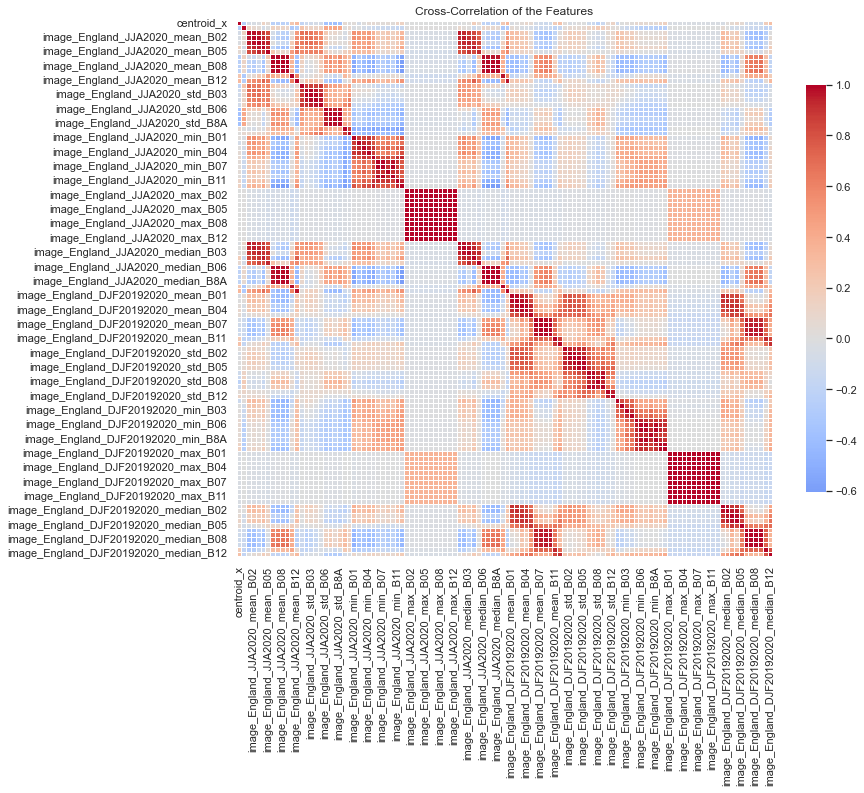

In [99]:
plot_corr_simple(image_features)

In [111]:
mean_image_features = image_features[[c for c in image_features if '_mean_' in c]]
std_image_features = image_features[[c for c in image_features if '_std_' in c]]
median_image_features = image_features[[c for c in image_features if '_median_' in c]]

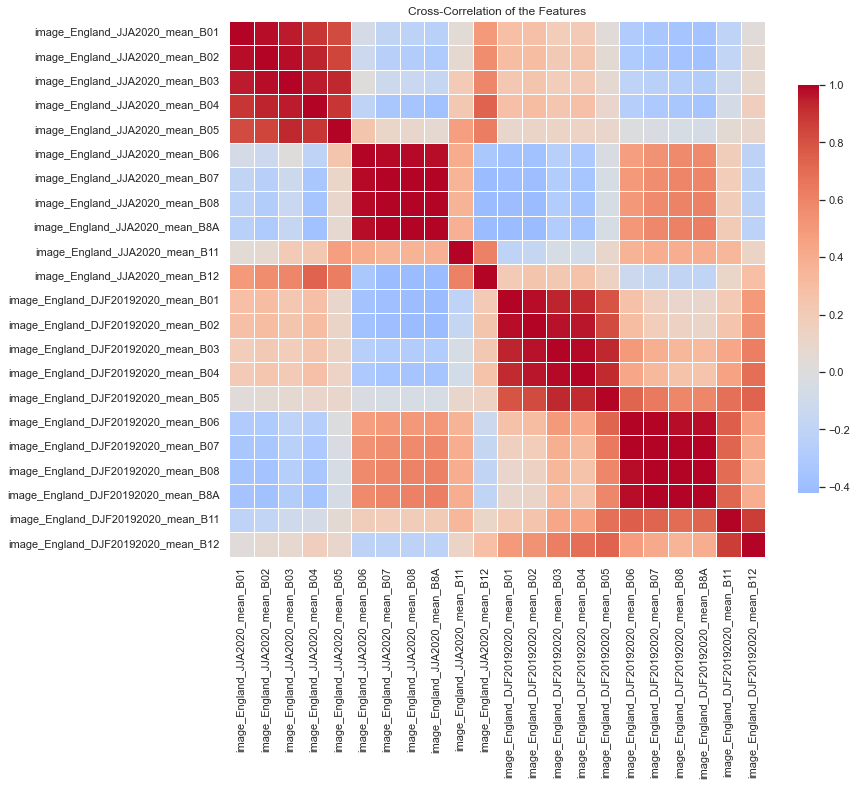

In [110]:
plot_corr_simple(mean_image_features)

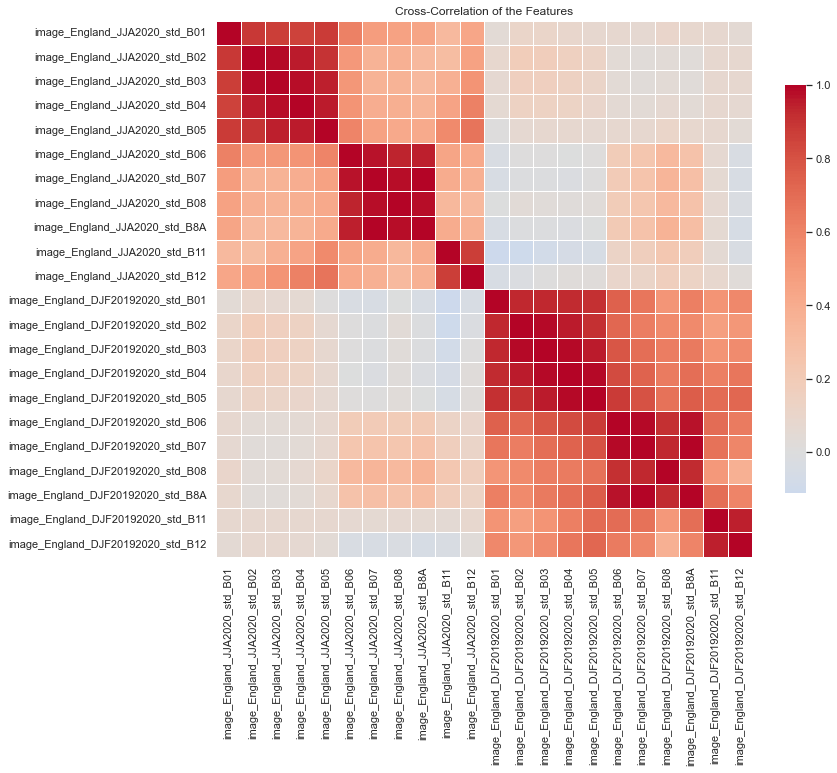

In [112]:
plot_corr_simple(std_image_features)

In [43]:
selected_mean_image_features = mean_image_features[[c for c in mean_image_features if ( ('B01' in c) or ('B06' in c) or  ('B12' in c))]]
selected_median_image_features = median_image_features[[c for c in median_image_features if ( ('B01' in c) or ('B06' in c) or  ('B12' in c))]]

/Users/sanja7s/mambaforge/envs/pomozi/lib/python3.10/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/sanja7s/mambaforge/envs/pomozi/lib/python3.10/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


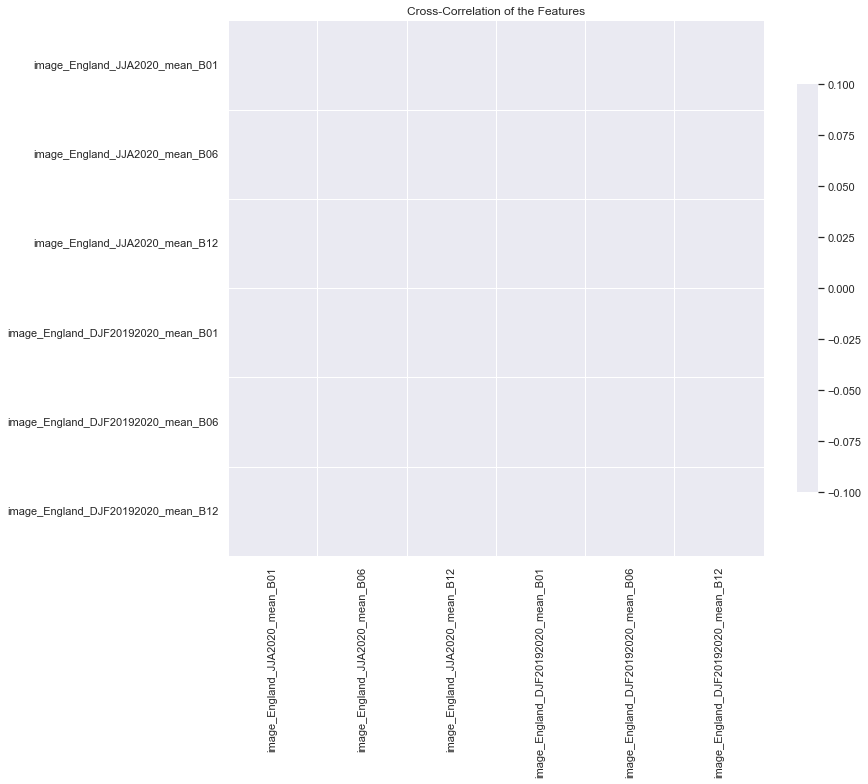

In [37]:
plot_corr(selected_mean_image_features)

In [39]:
selected_mean_image_features.corr()

,image_England_JJA2020_mean_B01,image_England_JJA2020_mean_B06,image_England_JJA2020_mean_B12,image_England_DJF20192020_mean_B01,image_England_DJF20192020_mean_B06,image_England_DJF20192020_mean_B12
image_England_JJA2020_mean_B01,1.000000,-0.070064,0.496776,0.282020,-0.292706,0.031449
image_England_JJA2020_mean_B06,-0.070064,1.000000,-0.324526,-0.366338,0.476161,-0.211073
image_England_JJA2020_mean_B12,0.496776,-0.324526,1.000000,0.204672,-0.122102,0.285213
image_England_DJF20192020_mean_B01,0.282020,-0.366338,0.204672,1.000000,0.268455,0.497013
image_England_DJF20192020_mean_B06,-0.292706,0.476161,-0.122102,0.268455,1.000000,0.483841
image_England_DJF20192020_mean_B12,0.031449,-0.211073,0.285213,0.497013,0.483841,1.000000


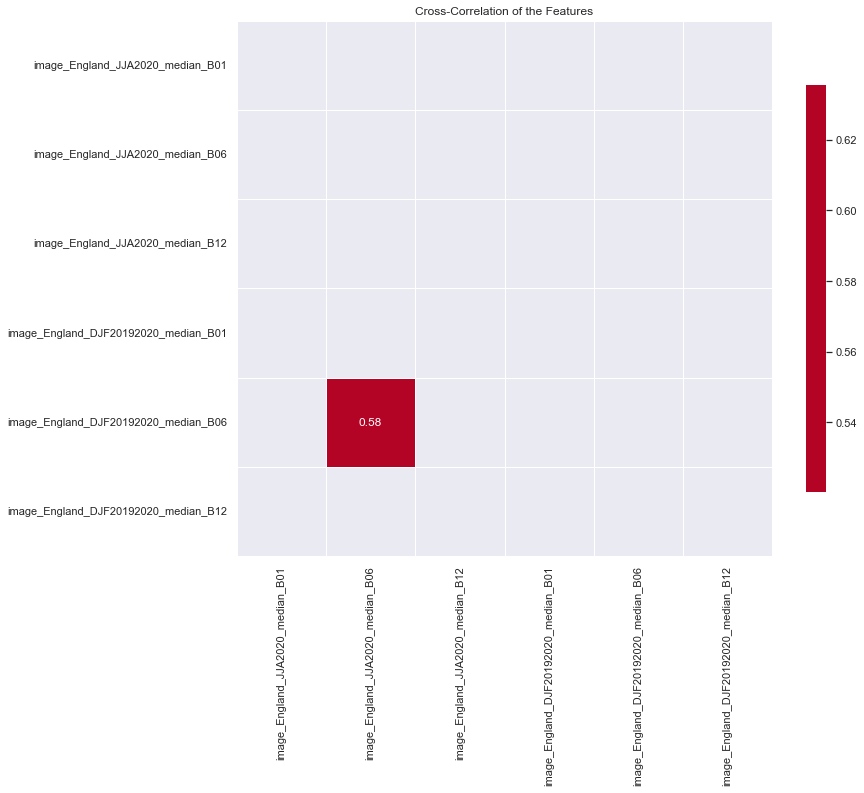

In [44]:
plot_corr(selected_median_image_features)

In [53]:
image_features

,centroid_x,centroid_y,image_England_JJA2020_mean_B01,image_England_JJA2020_mean_B02,image_England_JJA2020_mean_B03,image_England_JJA2020_mean_B04,image_England_JJA2020_mean_B05,image_England_JJA2020_mean_B06,image_England_JJA2020_mean_B07,image_England_JJA2020_mean_B08,...,image_England_DJF20192020_median_B02,image_England_DJF20192020_median_B03,image_England_DJF20192020_median_B04,image_England_DJF20192020_median_B05,image_England_DJF20192020_median_B06,image_England_DJF20192020_median_B07,image_England_DJF20192020_median_B08,image_England_DJF20192020_median_B8A,image_England_DJF20192020_median_B11,image_England_DJF20192020_median_B12
geography code,,,,,,,,,,,,,,,,,,,,,
E01000001,532151.194178,181615.201393,973.589602,993.601800,1107.802378,1150.589243,1305.986473,1548.814158,1639.797004,1627.980678,...,656.003967,633.996201,658.875000,747.133331,777.741669,784.906250,783.943176,793.658325,808.570801,744.962494
E01000002,532443.686041,181645.724884,1035.803002,1087.597044,1175.244105,1207.774891,1331.071380,1491.051409,1550.711356,1545.371219,...,661.000000,621.416672,631.222214,716.875000,739.022736,750.283356,734.750000,761.583344,785.066650,723.520844
E01000003,532207.014825,182030.129598,1038.749565,1118.206087,1232.860815,1261.383152,1441.906902,1747.351957,1865.427500,1937.966196,...,635.886353,589.171631,599.669647,686.916656,718.212769,736.645813,678.145264,744.304749,728.789673,673.402466
E01000005,533618.348516,181157.354255,1092.485828,1175.653961,1271.715499,1332.200985,1436.385633,1546.487726,1602.509957,1624.280660,...,571.839294,552.053574,582.625000,647.281250,657.062500,658.687500,679.625000,669.241089,738.983307,688.943466
E01000006,544934.369716,184297.546524,766.364078,814.705704,972.686546,1073.925017,1312.023578,1729.946255,1903.895111,1912.268724,...,687.000000,763.333313,827.000000,859.000000,1026.000000,1049.000000,1270.599976,1057.000000,1024.000000,881.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01033758,335484.842346,390892.449103,918.303453,1026.977110,1141.971343,1177.749514,1362.923551,1641.534694,1756.633662,1799.014044,...,622.600006,590.625000,608.250000,750.558441,817.125000,834.211121,914.000000,855.366669,843.536346,718.000000
E01033760,334854.878150,390512.803862,1220.773819,1266.102193,1366.273678,1431.826948,1579.423502,1698.975774,1759.328668,1729.900569,...,630.924988,566.855530,596.483337,684.833344,709.424988,717.299988,740.299988,728.500000,720.729156,638.216644
E01033761,334938.635295,389889.855827,1109.465838,1243.417772,1298.040724,1343.763981,1427.670207,1488.756196,1539.734906,1557.552358,...,516.812500,455.134918,495.214279,567.821442,579.528564,582.476196,567.475006,597.000000,590.716644,533.937500


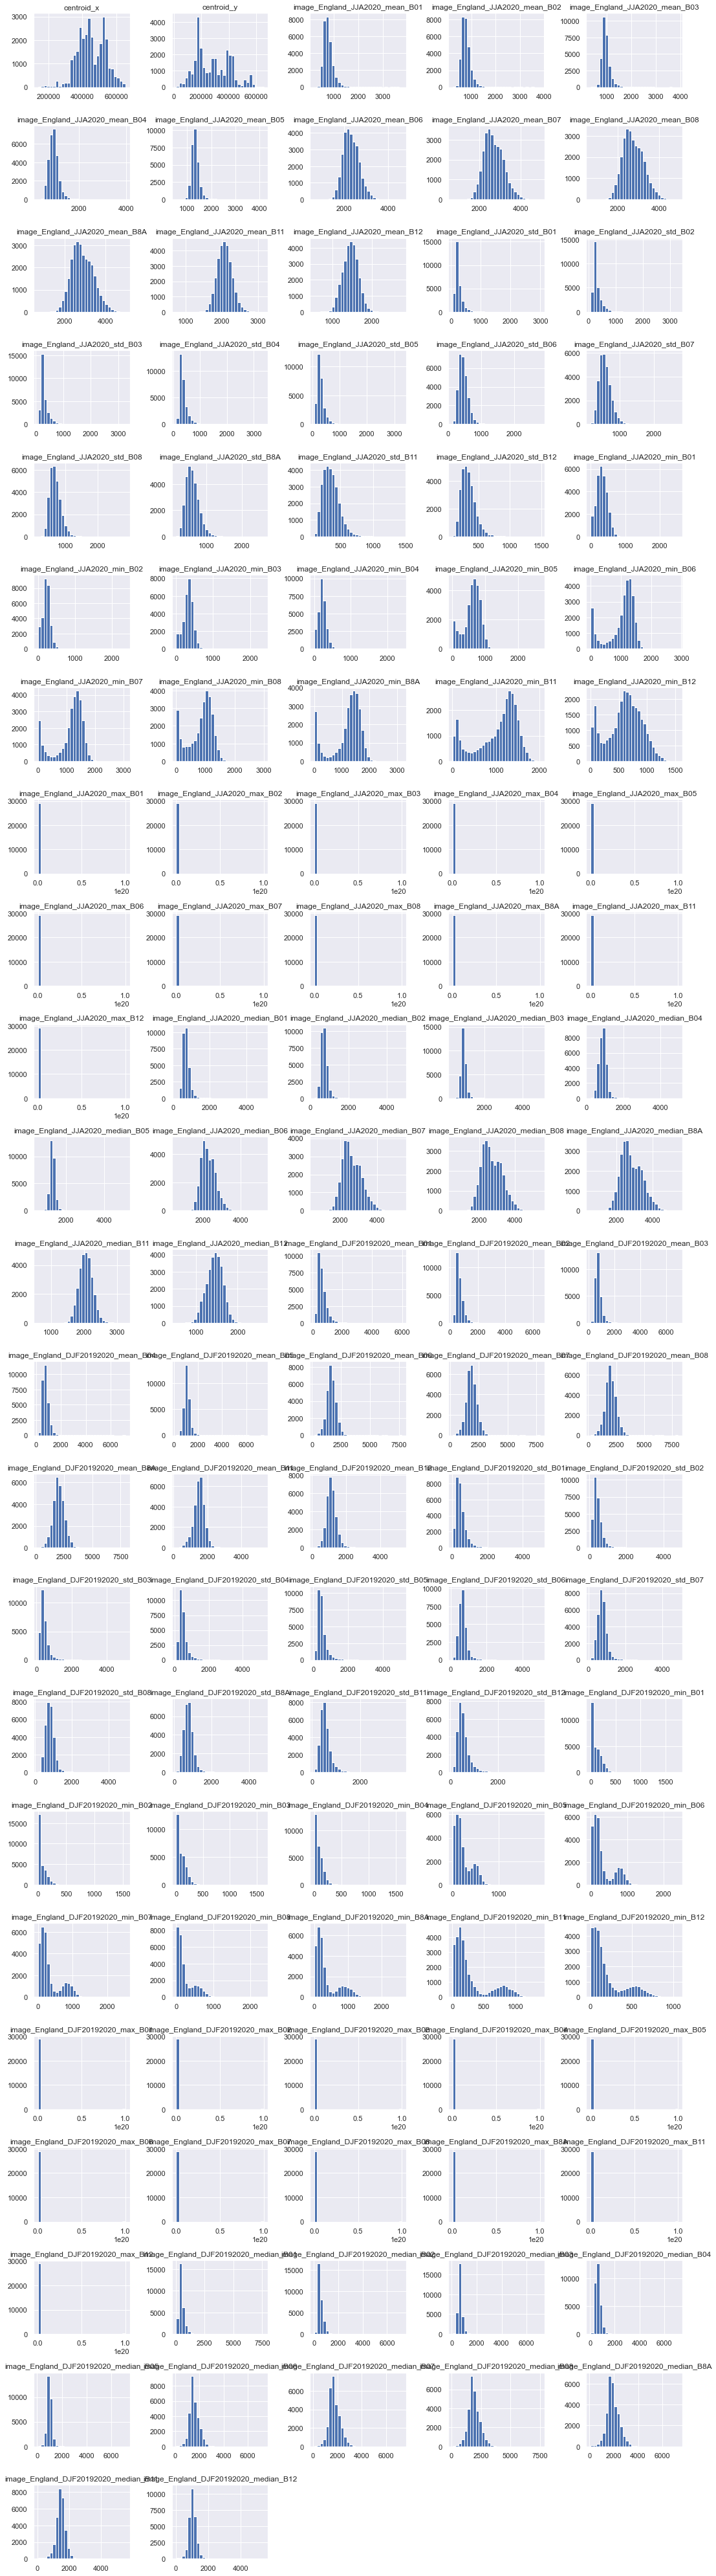

In [56]:
data = image_features
# Define number of rows and columns
# Using Pandas histogram
# Adjust the layout to your needs. Here, I'm using a 10x5 grid for 50 features.
ax = data.hist(figsize=(15, 60), bins=30, layout=(25,5))

# Add some padding to prevent label overlap
plt.tight_layout()
plt.show()

In [71]:
def plot_distr(data):
    # Calculate the number of rows required
    n_cols = 4
    n_rows = (len(data.columns) - 1) // n_cols + 1

    # Adjust the height based on the number of rows
    height_per_row = 3  # You can adjust this value based on your preference
    fig_height = n_rows * height_per_row

    # Plot using Pandas histogram
    ax = data.hist(figsize=(15, fig_height), bins=30, layout=(n_rows, n_cols))

    # Add some padding to prevent label overlap
    plt.tight_layout()
    plt.show()

In [81]:
type_image_features = image_features[[c for c in image_features if (('_std_' in c) or ('_mean_' in c)) ]]
selected_bands_image_features = type_image_features[[c for c in type_image_features if ( ('B01' in c) or ('B06' in c) or  ('B12' in c))]]

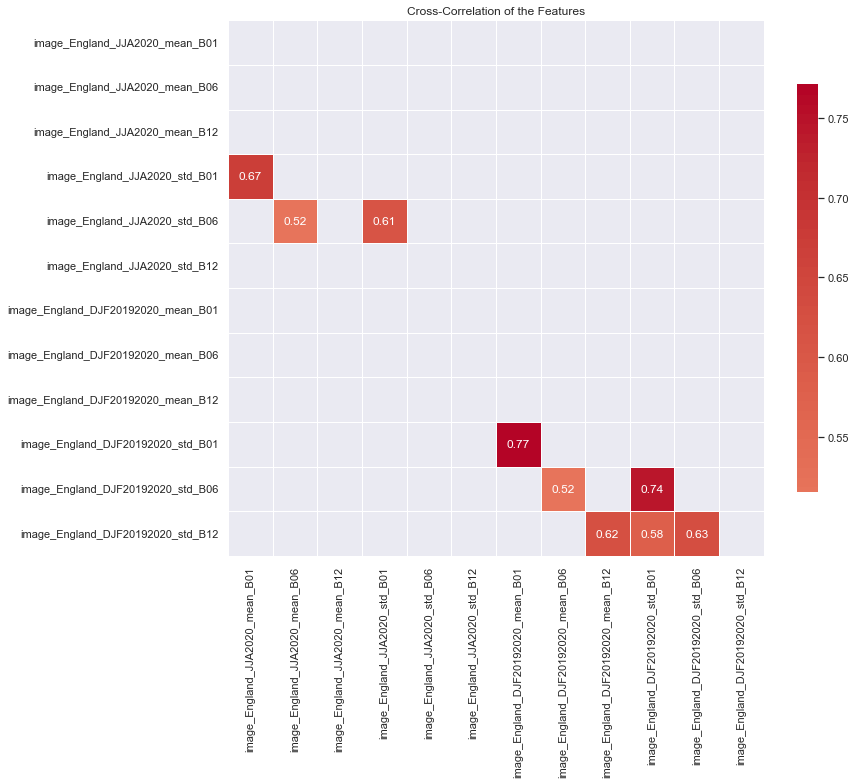

In [82]:
plot_corr(selected_bands_image_features)

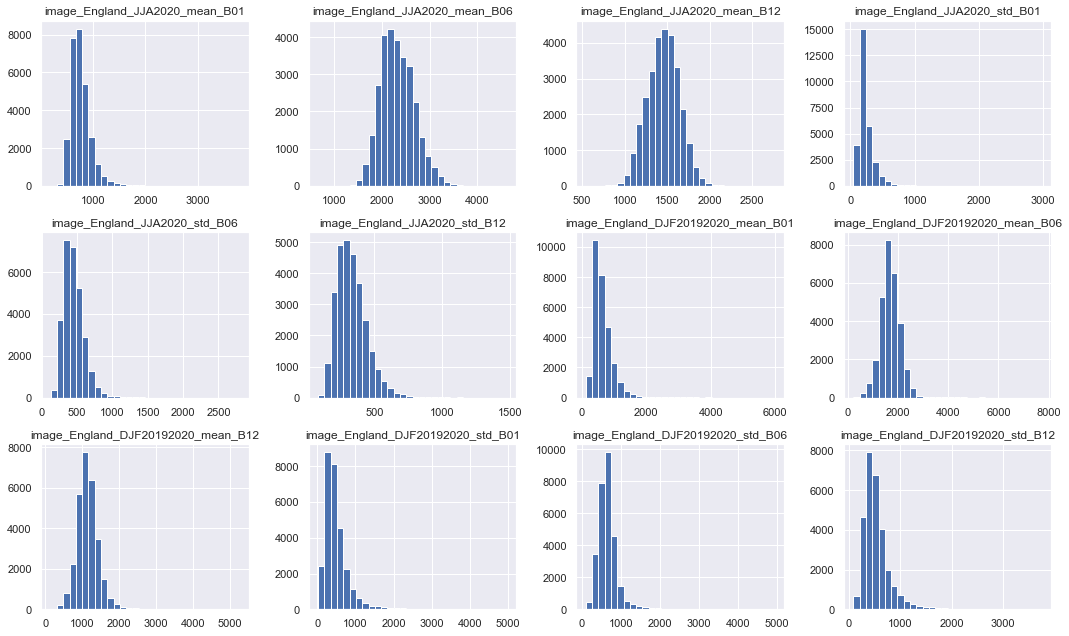

In [83]:
plot_distr(selected_bands_image_features)

In [92]:
X = data.copy()

In [93]:
        X = X[[c for c in X if ( ('image' not in c) or ((('_mean_' in c) or ('_std_' in c)) & (('B01' in c) or ('B06' in c) or  ('B12' in c)))) ]]
        X_vars = list(X.columns)

In [94]:
X_vars

['LSOA21NM',
 'centroid_x',
 'centroid_y',
 'c_percent asian',
 'c_percent black',
 'c_percent mixed',
 'c_percent white',
 'c_percent christian',
 'c_percent jewish',
 'c_percent no religion',
 'c_percent muslim',
 'c_percent no central heating',
 'c_percent wood heating',
 'c_percent communal heating',
 'c_percent TFW less than 2km',
 'c_percent TFW 2km to 5km',
 'c_percent TFW 60km and over',
 'c_percent WFH',
 'c_percent part-time',
 'c_percent 15 hours or less worked',
 'c_percent 49 or more hours worked',
 'c_percent commute on foot',
 'c_percent commute bus',
 'c_percent commute bicycle',
 'c_percent same address',
 'c_percent student moved to address',
 'c_percent occupancy rating bedrooms +2',
 'c_percent occupancy rating bedrooms 0',
 'c_percent occupancy rating bedrooms -2',
 'c_percent occupancy rating rooms +2',
 'c_percent occupancy rating rooms 0',
 'c_percent occupancy rating rooms -2',
 'c_percent 1. Managers directors and senior officials',
 'c_percent 2. Professional

In [95]:
X

,LSOA21NM,centroid_x,centroid_y,c_percent asian,c_percent black,c_percent mixed,c_percent white,c_percent christian,c_percent jewish,c_percent no religion,...,image_England_JJA2020_mean_B12,image_England_JJA2020_std_B01,image_England_JJA2020_std_B06,image_England_JJA2020_std_B12,image_England_DJF20192020_mean_B01,image_England_DJF20192020_mean_B06,image_England_DJF20192020_mean_B12,image_England_DJF20192020_std_B01,image_England_DJF20192020_std_B06,image_England_DJF20192020_std_B12
geography code,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,532151.194178,181615.201393,0.107191,0.007463,0.037992,0.801221,0.345763,0.019661,0.483390,...,1365.189268,302.623822,419.475430,322.304974,669.000604,814.561200,821.578936,306.169708,403.909187,445.418234
E01000002,City of London 001B,532443.686041,181645.724884,0.130592,0.007937,0.043290,0.782107,0.338150,0.025289,0.491329,...,1344.267909,290.370663,398.575068,407.426237,690.271792,765.440841,759.953427,314.455459,381.342175,411.273611
E01000003,City of London 001C,532207.014825,182030.129598,0.094913,0.034739,0.062655,0.741315,0.340360,0.026658,0.479851,...,1484.191685,217.621319,387.111945,222.002975,770.081065,808.053626,749.756887,416.042733,481.510028,471.031777
E01000005,City of London 001E,533618.348516,181157.354255,0.321526,0.108084,0.071753,0.385104,0.367514,0.012704,0.221416,...,1530.284379,239.887835,317.282981,253.572512,579.676857,684.200021,735.322670,330.417309,399.208350,420.371701
E01000006,Barking and Dagenham 016A,544934.369716,184297.546524,0.479675,0.108401,0.037940,0.327913,0.371614,0.000542,0.070423,...,1599.886442,70.816747,187.265101,131.665970,659.867722,1050.463766,859.090427,496.253907,203.369402,144.186215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01033758,Liverpool 060B,335484.842346,390892.449103,0.314796,0.047959,0.037245,0.557653,0.277041,0.001020,0.428571,...,1551.302308,201.713175,360.545075,371.313212,620.659089,912.374900,809.968763,217.858825,469.018085,488.676123
E01033760,Liverpool 060C,334854.878150,390512.803862,0.087535,0.021783,0.033481,0.831384,0.279483,0.001212,0.511712,...,1788.674397,416.225479,586.836141,837.254943,683.269474,787.312450,701.799867,329.442314,464.259762,384.368942
E01033761,Liverpool 060D,334938.635295,389889.855827,0.091667,0.037500,0.035648,0.748148,0.281279,0.000927,0.480074,...,1455.650379,210.724365,297.616881,213.325733,581.108359,627.673688,569.242850,178.039091,263.454906,204.604610
